## BOW (Bag of Words)

#### 문서를 숫자 벡터로 변환하는 가장 기본적인 방법은 BOW (Bag of Words) 이다. 

BOW 방법에서는 전체 문서  {𝑑1,𝑑2,…,𝑑𝑛}  를 구성하는 고정된 단어장(vocabulary)  {𝑡1,𝑡2,…,𝑡𝑚}  를 만들고  𝑑𝑖 라는 개별 문서에 단어장에 해당하는 단어들이 포함되어 있는지를 표시하는 방법이다.

$$x_{i,j} = \text{문서 $d_i$내의 단어 $t_j$의 출현 빈도}$$

또는

$$x_{i,j} = 
\begin{cases}
0, & \text{만약 단어 $t_j$가 문서 $d_i$ 안에 없으면} \\
1. & \text{만약 단어 $t_j$가 문서 $d_i$ 안에 있으면}
\end{cases}$$

## Scikit-Learn 의 문서 전처리 기능

Scikit-Learn 의 feature_extraction 서브패키지와 feature_extraction.text 서브 패키지는 다음과 같은 문서 전처리용 클래스를 제공한다.

+ DictVectorizer:
    + 각 단어의 수를 세어놓은 사전에서 BOW 벡터를 만든다.

+ CountVectorizer:
    + 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩한 벡터를 만든다.

+ TfidfVectorizer:
    + CountVectorizer와 비슷하지만 TF-IDF 방식으로 단어의 가중치를 조정한 BOW 벡터를 만든다.

+ HashingVectorizer:
    + 해시 함수(hash function)을 사용하여 적은 메모리와 빠른 속도로 BOW 벡터를 만든다.

### DictVectorizer
#### DictVectorizer는 feature_extraction 서브 패키지에서 제공한다. 

문서에서 단어의 사용 빈도를 나타내는 딕셔너리 정보를 입력받아 BOW 인코딩한 수치 벡터로 변환한다.

In [1]:
from sklearn.feature_extraction import DictVectorizer

In [2]:
v = DictVectorizer(sparse=False)
D = [{"A": 1, 'B': 2}, {'B': 3, 'C': 1}] # 2 x 3 (A, B, C)
X = v.fit_transform(D)
X

array([[1., 2., 0.],
       [0., 3., 1.]])

In [3]:
v.feature_names_

['A', 'B', 'C']

In [4]:
v.transform({"C": 4, "D": 3}) # D는 없기 때문에 적용 안됨

array([[0., 0., 4.]])

### CountVectorizer

CountVectorizer는 다음과 같은 세가지 작업을 수행한다.

(1) 문서를 토큰 리스트로 변환한다.

(2) 각 문서에서 토큰의 출현 빈도를 센다.

(3) 각 문서를 BOW 인코딩 벡터로 변환한다.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
    'The last document?',
]

vect = CountVectorizer()
vect.fit(corpus)
vect.vocabulary_

{'this': 9,
 'is': 3,
 'the': 7,
 'first': 2,
 'document': 1,
 'second': 6,
 'and': 0,
 'third': 8,
 'one': 5,
 'last': 4}

In [7]:
vect.transform(["This is the second document."]).toarray() # [] 리스트 타입으로 입력해야 함. 벡터로 바꿔줌

array([[0, 1, 0, 1, 0, 0, 1, 1, 0, 1]])

In [8]:
vect.transform(["Something completely new."]).toarray() # 토큰 안에 들어가 있는 단어가 없기 때문에 모두 0

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [9]:
vect.transform(corpus).toarray()  # 5 X 10 행렬 생성

array([[0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 1, 0, 0, 1, 0, 0]])

CountVectorizer는 이러한 작업을 하기 위한 다음과 같은 인수를 가질 수 있다.

+ stop_words : 문자열 {‘english’}, 리스트 또는 None (디폴트)
    + stop words 목록.‘english’이면 영어용 스탑 워드 사용.
+ analyzer : 문자열 {‘word’, ‘char’, ‘char_wb’} 또는 함수
    + 단어 n-그램, 문자 n-그램, 단어 내의 문자 n-그램
+ token_pattern : string
    + 토큰 정의용 정규 표현식
+ tokenizer : 함수 또는 None (디폴트)
    + 토큰 생성 함수 .
+ ngram_range : (min_n, max_n) 튜플
    + n-그램 범위
+ max_df : 정수 또는 [0.0, 1.0] 사이의 실수. 디폴트 1
    + 단어장에 포함되기 위한 최대 빈도
+ min_df : 정수 또는 [0.0, 1.0] 사이의 실수. 디폴트 1
    + 단어장에 포함되기 위한 최소 빈도

### Stop Words

#### Stop Words는 문서에서 단어장을 생성할 때 무시할 수 있는 단어를 말한다. 

보통 영어의 관사나 접속사, 한국어의 조사 등이 여기에 해당한다. stop_words 인수로 조절할 수 있다.

In [10]:
vect = CountVectorizer(stop_words=["and", "is", "the", "this"]).fit(corpus)
vect.vocabulary_ # 사전 단어 수가 10개에서 6개로 줄어듬

{'first': 1, 'document': 0, 'second': 4, 'third': 5, 'one': 3, 'last': 2}

In [11]:
vect = CountVectorizer(stop_words="english").fit(corpus)
vect.vocabulary_  # 사전 단어 수가 2개로 감소

{'document': 0, 'second': 1}

### 토큰

analyzer, tokenizer, token_pattern 등의 인수로 사용할 토큰 생성기를 선택할 수 있다.

In [12]:
vect = CountVectorizer(analyzer="char").fit(corpus) # 문자로 다 쪼갬
vect.vocabulary_

{'t': 16,
 'h': 8,
 'i': 9,
 's': 15,
 ' ': 0,
 'e': 6,
 'f': 7,
 'r': 14,
 'd': 5,
 'o': 13,
 'c': 4,
 'u': 17,
 'm': 11,
 'n': 12,
 '.': 1,
 'a': 3,
 '?': 2,
 'l': 10}

In [13]:
vect = CountVectorizer(analyzer="word").fit(corpus) # 단어로 쪼갬
vect.vocabulary_

{'this': 9,
 'is': 3,
 'the': 7,
 'first': 2,
 'document': 1,
 'second': 6,
 'and': 0,
 'third': 8,
 'one': 5,
 'last': 4}

In [14]:
vect = CountVectorizer(analyzer="char_wb").fit(corpus) # ??
vect.vocabulary_

{' ': 0,
 't': 16,
 'h': 8,
 'i': 9,
 's': 15,
 'e': 6,
 'f': 7,
 'r': 14,
 'd': 5,
 'o': 13,
 'c': 4,
 'u': 17,
 'm': 11,
 'n': 12,
 '.': 1,
 'a': 3,
 '?': 2,
 'l': 10}

In [15]:
vect = CountVectorizer(token_pattern="t\w+").fit(corpus) # t로 시작하는 단어만 딕셔너리로 만들기
vect.vocabulary_

{'this': 2, 'the': 0, 'third': 1}

In [16]:
import nltk

vect = CountVectorizer(tokenizer=nltk.word_tokenize).fit(corpus)
vect.vocabulary_

{'this': 11,
 'is': 5,
 'the': 9,
 'first': 4,
 'document': 3,
 '.': 0,
 'second': 8,
 'and': 2,
 'third': 10,
 'one': 7,
 '?': 1,
 'last': 6}

### n-그램

#### n-그램은 단어장 생성에 사용할 토큰의 크기를 결정한다. 

모노그램(1-그램)은 토큰 하나만 단어로 사용하며 바이그램(2-그램)은 두 개의 연결된 토큰을 하나의 단어로 사용한다.

In [17]:
vect = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
vect.vocabulary_

{'this is': 12,
 'is the': 2,
 'the first': 7,
 'first document': 1,
 'the second': 9,
 'second second': 6,
 'second document': 5,
 'and the': 0,
 'the third': 10,
 'third one': 11,
 'is this': 3,
 'this the': 13,
 'the last': 8,
 'last document': 4}

In [18]:
vect = CountVectorizer(ngram_range=(1, 2), token_pattern="t\w+").fit(corpus) # t로 시작하는 단어의 한단어, 두단어로 구성된 사전 추출
vect.vocabulary_

{'this': 3, 'the': 0, 'this the': 4, 'third': 2, 'the third': 1}

### 빈도수

#### max_df, min_df 인수를 사용하여 문서에서 토큰이 나타난 횟수를 기준으로 단어장을 구성할 수도 있다. 

토큰의 빈도가 max_df로 지정한 값을 초과 하거나 min_df로 지정한 값보다 작은 경우에는 무시한다. 인수 값은 정수인 경우 횟수, 부동소수점인 경우 비중을 뜻한다.

In [19]:
vect = CountVectorizer(max_df=4, min_df=2).fit(corpus)  # 빈도수가 2~4개로만 된 단어 사전
vect.vocabulary_

{'this': 3, 'is': 2, 'first': 1, 'document': 0}

In [20]:
vect.stop_words_  # 제거된 단어들

{'and', 'last', 'one', 'second', 'the', 'third'}

In [21]:
vect.transform(corpus).toarray().sum(axis=0)  # 벡터화 후 각 단어별로 횟수 구하기

array([4, 2, 3, 3])

In [22]:
vect.transform(corpus).toarray()

array([[1, 1, 1, 1],
       [1, 0, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [1, 0, 0, 0]])

## TF-IDF

TF-IDF(Term Frequency – Inverse Document Frequency) 인코딩은 단어를 갯수 그대로 카운트하지 않고 
#### 모든 문서에 공통적으로 들어있는 단어의 경우 문서 구별 능력이 떨어진다고 해서 가중치를 축소하는 방법이다.

구제적으로는 문서  𝑑 (document)와 단어  𝑡  에 대해 다음과 같이 계산한다.

$$\text{tf-idf}(d, t) = \text{tf}(d, t) \cdot \text{idf}(t)$$

여기에서

+ tf(𝑑,𝑡) : term frequency. 특정한 단어의 빈도수
+ idf(𝑡)  : inverse document frequency. 특정한 단어가 들어 있는 문서의 수에 반비례하는 수

$$\text{idf}(d, t) = \log \dfrac{n}{1 + \text{df}(t)}$$

+ 𝑛  : 전체 문서의 수
+ df(𝑡) : 단어  𝑡 를 가진 문서의 수

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
tfidv = TfidfVectorizer().fit(corpus)
tfidv.transform(corpus).toarray()

array([[0.        , 0.38947624, 0.55775063, 0.4629834 , 0.        ,
        0.        , 0.        , 0.32941651, 0.        , 0.4629834 ],
       [0.        , 0.24151532, 0.        , 0.28709733, 0.        ,
        0.        , 0.85737594, 0.20427211, 0.        , 0.28709733],
       [0.55666851, 0.        , 0.        , 0.        , 0.        ,
        0.55666851, 0.        , 0.26525553, 0.55666851, 0.        ],
       [0.        , 0.38947624, 0.55775063, 0.4629834 , 0.        ,
        0.        , 0.        , 0.32941651, 0.        , 0.4629834 ],
       [0.        , 0.45333103, 0.        , 0.        , 0.80465933,
        0.        , 0.        , 0.38342448, 0.        , 0.        ]])

In [25]:
tfidv.transform(corpus).toarray().shape

(5, 10)

## Hashing Trick

#### CountVectorizer는 모든 작업을 메모리 상에서 수행하므로 처리할 문서의 크기가 커지면 속도가 느려지거나 실행이 불가능해진다. 

이 때 HashingVectorizer를 사용하면 해시 함수를 사용하여 단어에 대한 인덱스 번호를 생성하기 때문에 메모리 및 실행 시간을 줄일 수 있다.

In [26]:
from sklearn.datasets import fetch_20newsgroups
twenty = fetch_20newsgroups()
len(twenty.data)

11314

In [27]:
%time CountVectorizer().fit(twenty.data).transform(twenty.data)

CPU times: user 6.19 s, sys: 139 ms, total: 6.33 s
Wall time: 6.46 s


<11314x130107 sparse matrix of type '<class 'numpy.int64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

In [28]:
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(n_features=300000)

In [29]:
%time hv.transform(twenty.data)

CPU times: user 3.2 s, sys: 87.8 ms, total: 3.29 s
Wall time: 2.59 s


<11314x300000 sparse matrix of type '<class 'numpy.float64'>'
	with 1786336 stored elements in Compressed Sparse Row format>

## 사례

다음은 Scikit-Learn의 문자열 분석기를 사용하여 웹사이트에 특정한 단어가 어느 정도 사용되었는지 빈도수를 알아보는 코드이다.

In [30]:
import warnings
warnings.simplefilter("ignore")

import json
import string
from urllib.request import urlopen
from konlpy.utils import pprint
from konlpy.tag import Hannanum

In [31]:
hannanum = Hannanum()

f = urlopen("https://www.datascienceschool.net/download-notebook/708e711429a646818b9dcbb581e0c10a/")
json = json.loads(f.read()) # json type

In [32]:
pprint(json)

{'cells': [{'cell_type': 'markdown',
            'metadata': {'school_cell_uuid': '0594321f28a747eb855ffe35b7578bff'},
            'source': ['# 도커 초간단 사용법']},
           {'cell_type': 'markdown',
            'metadata': {'school_cell_uuid': '03b0db4add074be9bc4836fbd330884d'},
            'source': ['도커를 사용하기 위한 핵심 명령어를 간단히 소개한다.']},
           {'cell_type': 'markdown',
            'metadata': {'school_cell_uuid': 'f9906a0b03e849fabfbc3f659f5a05f6'},
            'source': ['도커를 사용하려면 우선 이미지(Image)와 컨테이너(container)의 개념을 알아야 '
                       '한다.']},
           {'cell_type': 'markdown',
            'metadata': {'school_cell_uuid': 'aa6002c468c4409a96fe38ef35d5e157'},
            'source': ['## 도커 이미지']},
           {'cell_type': 'markdown',
            'metadata': {'school_cell_uuid': '3d154a5f2373493bbc88d54ccc69b2ef'},
            'source': ['도커 이미지는 가상 머신의 원본이 저장된 파일이라고 생각하면 이해하기 쉽다.']},
           {'cell_type': 'markdown',
            'metadata': {'school_cell_uuid': '118b68

In [33]:
cell = ["\n".join(c["source"]) for c in json["cells"] if c["cell_type"] == "markdown"]  # cells 안에 있는 cell_type이 markdown인 source에 있는 내용만 추출
cell

['# 도커 초간단 사용법',
 '도커를 사용하기 위한 핵심 명령어를 간단히 소개한다.',
 '도커를 사용하려면 우선 이미지(Image)와 컨테이너(container)의 개념을 알아야 한다.',
 '## 도커 이미지',
 '도커 이미지는 가상 머신의 원본이 저장된 파일이라고 생각하면 이해하기 쉽다.',
 '도커 이미지와 관련하여 많이 사용되는 명령어는 두 가지가 있다.\n\n\n\n* `docker image ls`, `docker images` : 현재 도커 이미지 목록 출력\n\n* `docker image rm`, `docker rmi` : 하나 이상의 도커 이미지 삭제\n\n\n\n더 많은 이미지 조작 명령어는 다음 링크를 참조한다. (https://docs.docker.com/engine/reference/commandline/image/#child-commands)',
 '## 목록 출력 명령',
 '우선 `docker image ls` 명령은 현재 파일 시스템에 저장된 도커 이미지 목록을 출력한다.\n\n\n\n리눅스에서 도커를 사용하고 있다면 터미널을, 윈도우즈나 맥에서 도커 툴박스를 사용하고 있다면 도커 터미널을 시작한 후 다음과 같이 `docker image ls` 명령을 입력해 보자.',
 '```\n\n$ docker image ls\n\nREPOSITORY                  TAG                 IMAGE ID            CREATED             SIZE\n\ndatascienceschool/rpython   latest              0f8c972cf717        4 months ago        17GB\n\ndatascienceschool/ubuntu    latest              5faa77abe3b5        4 months ago        4.49GB\n\n```',
 '현재 파일 시스템에 존재하는 모든 이미지의 목록을 보여준다. \n\n\n\n이

In [34]:
# 숫자 제거, 부호 제거한 후 명사만 추출
docs = [
    w for w in hannanum.nouns(" ".join(cell))
    if ((not w[0].isnumeric()) and (w[0] not in string.punctuation))
]

docs

['도커',
 '초간단',
 '사용법',
 '도커',
 '사용',
 '핵심',
 '명령어',
 '소개',
 '도커',
 '사용',
 '이미지(Image)',
 '컨테이너(container)',
 '개념',
 '도커',
 '이미지',
 '도커',
 '이미지',
 '가상',
 '머신',
 '원본',
 '저장',
 '파일',
 '생각',
 '이해',
 '도커',
 '이미지',
 '관련하',
 '사용',
 '명령어',
 '두',
 '가지',
 '도커',
 '이미지',
 '목록',
 '출력',
 '하나',
 '이상',
 '도커',
 '이미지',
 '삭제',
 '이미지',
 '조작',
 '명령어',
 '다음',
 '링크',
 '참조',
 '목록',
 '출력',
 '명령',
 '명령',
 '파',
 '시스템',
 '저장',
 '도커',
 '이미지',
 '목록',
 '출력',
 '리눅스',
 '도커',
 '사용',
 '터미널',
 '윈도우즈',
 '맥',
 '도커',
 '툴박스',
 '사용',
 '도커',
 '터미널',
 '시작',
 '후',
 '다음',
 '명령',
 '입력',
 '파',
 '시스템',
 '존재',
 '이미지',
 '목록',
 '이미지',
 '관련',
 '명령',
 '사용',
 '때',
 '이미지',
 '이름',
 '이미지',
 '아이디(ID)',
 '명시해',
 '이미지',
 '이름',
 '콜론(:)',
 '조합',
 '문자열',
 '태그(TAG)',
 '의',
 '경우',
 '생략',
 '수',
 '이미지',
 '아이디',
 '열',
 '명시',
 '예',
 '앞',
 '경우',
 '이미지',
 '이미지',
 '이미지',
 '이미지',
 '아이디',
 '사용',
 '때',
 '중복',
 '아이디',
 '앞',
 '문자',
 '일부분',
 '사용해',
 '예',
 '대',
 '사용',
 '수',
 '시작',
 '아이디',
 '때',
 '삭제',
 '명령',
 '특정',
 '이미지',
 '삭제',
 '다음',
 '뒤',
 '이미지',
 '이름',
 '문자열

여기에서는 하나의 문서가 하나의 단어로만 이루어져 있다. 따라서 CountVectorizer로 이 문서 집합을 처리하면 각 문서는 하나의 원소만 1이고 나머지 원소는 0인 벡터가 된다. 이 벡터의 합으로 빈도를 알아보았다.

In [35]:
import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

path = "/Library/Fonts/NanumGothic.otf"
font_name = fm.FontProperties(fname=path, size=20).get_name()

plt.rc('font', family=font_name)

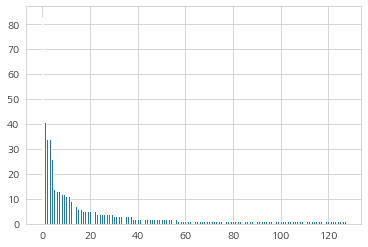

In [36]:
vect = CountVectorizer().fit(docs)
count = vect.transform(docs).toarray().sum(axis=0)
idx = np.argsort(-count) # sorting index 내림차순으로 바꾸기
count = count[idx]
feature_name = np.array(vect.get_feature_names())[idx] # 단어도 내림차순으로 바꾸기
plt.bar(range(len(count)), count)
plt.show()

In [37]:
pprint(list(zip(feature_name, count))[:10]) # 상위 10개만 추출

[('컨테이너', 83),
 ('도커', 41),
 ('명령', 34),
 ('이미지', 34),
 ('사용', 26),
 ('가동', 14),
 ('중지', 13),
 ('mingw64', 13),
 ('다음', 12),
 ('삭제', 12)]
